# Customer Churn Prediction

The Customer Churn table contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022


Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!

The Zip Code Population table contains complimentary information on the estimated populations for the California zip codes in the Customer Churn table

Importing necessary files

In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('/content/sample_data/customer_churn_large_dataset.csv')

In [7]:
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


Overviewing all the columns in the dataset

In [8]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [9]:
df1 = df.copy()

Creating a copy of the Dataset

In [10]:
df1.head(7)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0
5,6.0,Customer_6,67.0,Male,New York,15.0,82.65,456.0,1.0
6,7.0,Customer_7,30.0,Female,Chicago,3.0,73.79,269.0,0.0


In [11]:
df1.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# Exploratory Data Analysis

## Data Preprocessing

Dropping unwanted columns from the dataset

In [12]:
df1.shape

(100000, 9)

In [13]:
df1.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

Checking the number of unique values in each column

In [14]:
features = df1.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')

CustomerID--->99999
Name--->99999
Age--->53
Gender--->2
Location--->5
Subscription_Length_Months--->24
Monthly_Bill--->7001
Total_Usage_GB--->451
Churn--->2


Getting the percentge of Null Values in each Column

In [15]:
df1.isnull().sum() / df1.shape[0]

CustomerID                    0.00001
Name                          0.00001
Age                           0.00001
Gender                        0.00001
Location                      0.00001
Subscription_Length_Months    0.00001
Monthly_Bill                  0.00001
Total_Usage_GB                0.00001
Churn                         0.00001
dtype: float64

Cleaning Function for the Dataset

In [16]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [17]:
df1=df1.interpolate()

In [18]:
df1=df1.dropna()
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [19]:
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

Checking the unique values of column having datatype: 'object'

In [20]:
def unique_values_names(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [21]:
unique_values_names(df1)

Name:['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Gender:['Male' 'Female']
Location:['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


# Data Visualization

In [22]:
import plotly.express as px

Visualizing Column 'Age' in the dataset

In [23]:
fig = px.histogram(df1, x = 'Age')
fig.show()

Checking the stats in number_columns of the copied dataset

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Subscription_Length_Months'}>,
        <Axes: title={'center': 'Monthly_Bill'}>],
       [<Axes: title={'center': 'Total_Usage_GB'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

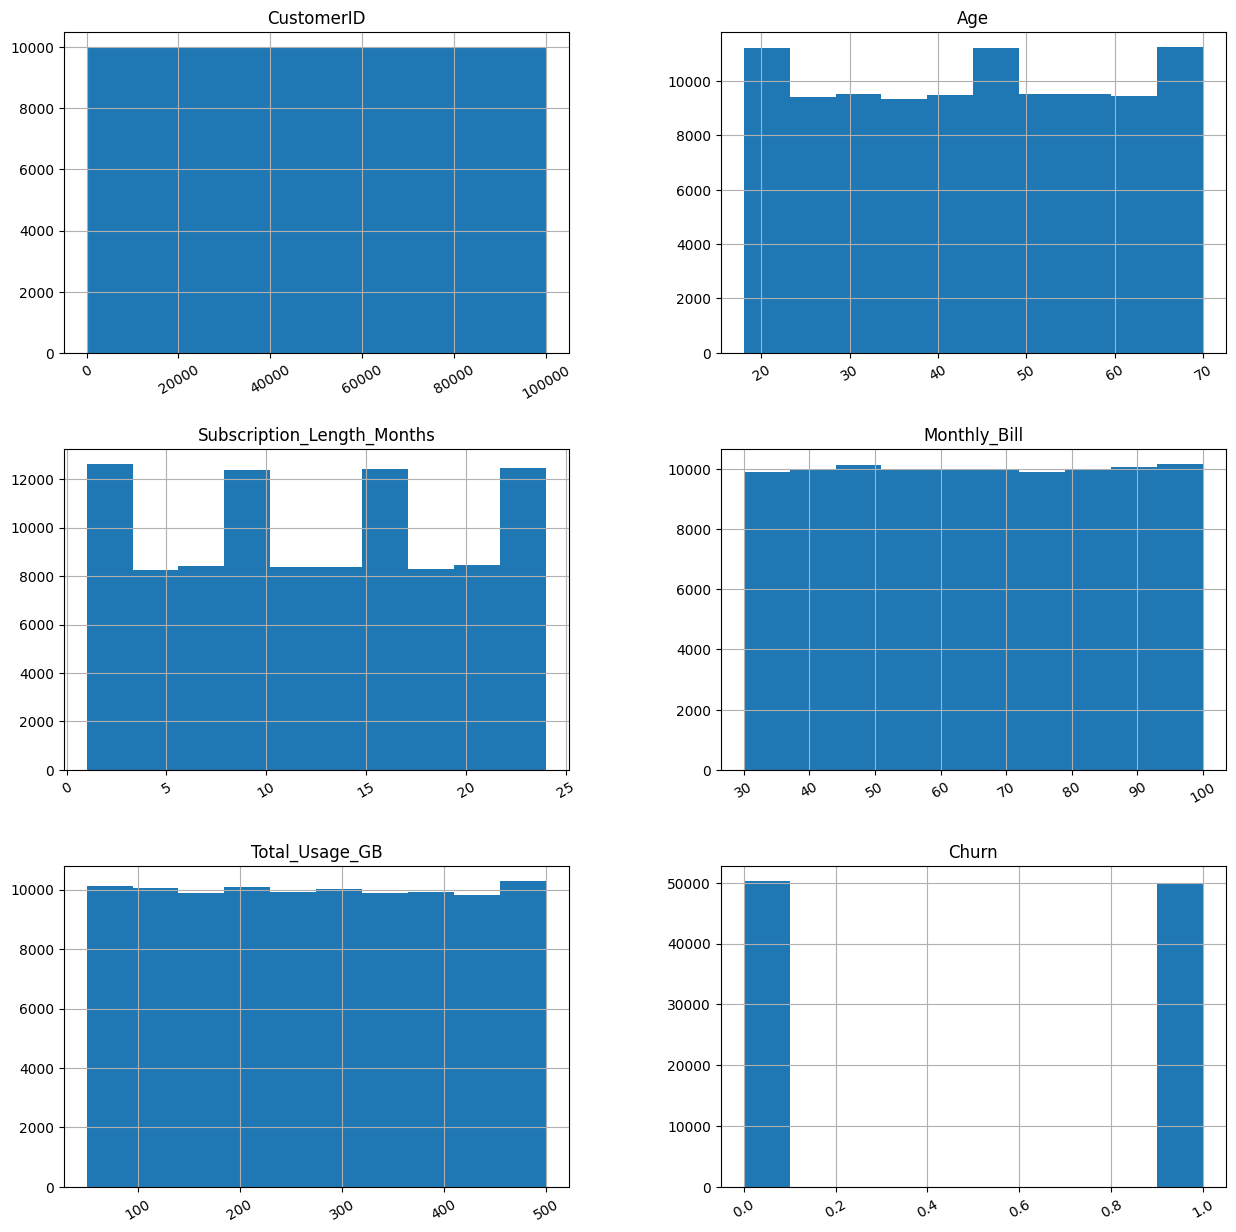

In [24]:
df1.hist(figsize=(15,15), xrot=30)

In [25]:
df1['Age']


0        63.0
1        62.0
2        24.0
3        36.0
4        46.0
         ... 
99995    33.0
99996    62.0
99997    64.0
99998    51.0
99999    27.0
Name: Age, Length: 99999, dtype: float64

In [26]:
import matplotlib.pyplot as plt

Visualizing the number of customers who churned, stayed or joined in the company with a bar plot

In [27]:
import seaborn as sns

 ## Defining Correlation between the columns in the dataset

<ipython-input-28-026dd72ebe45>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

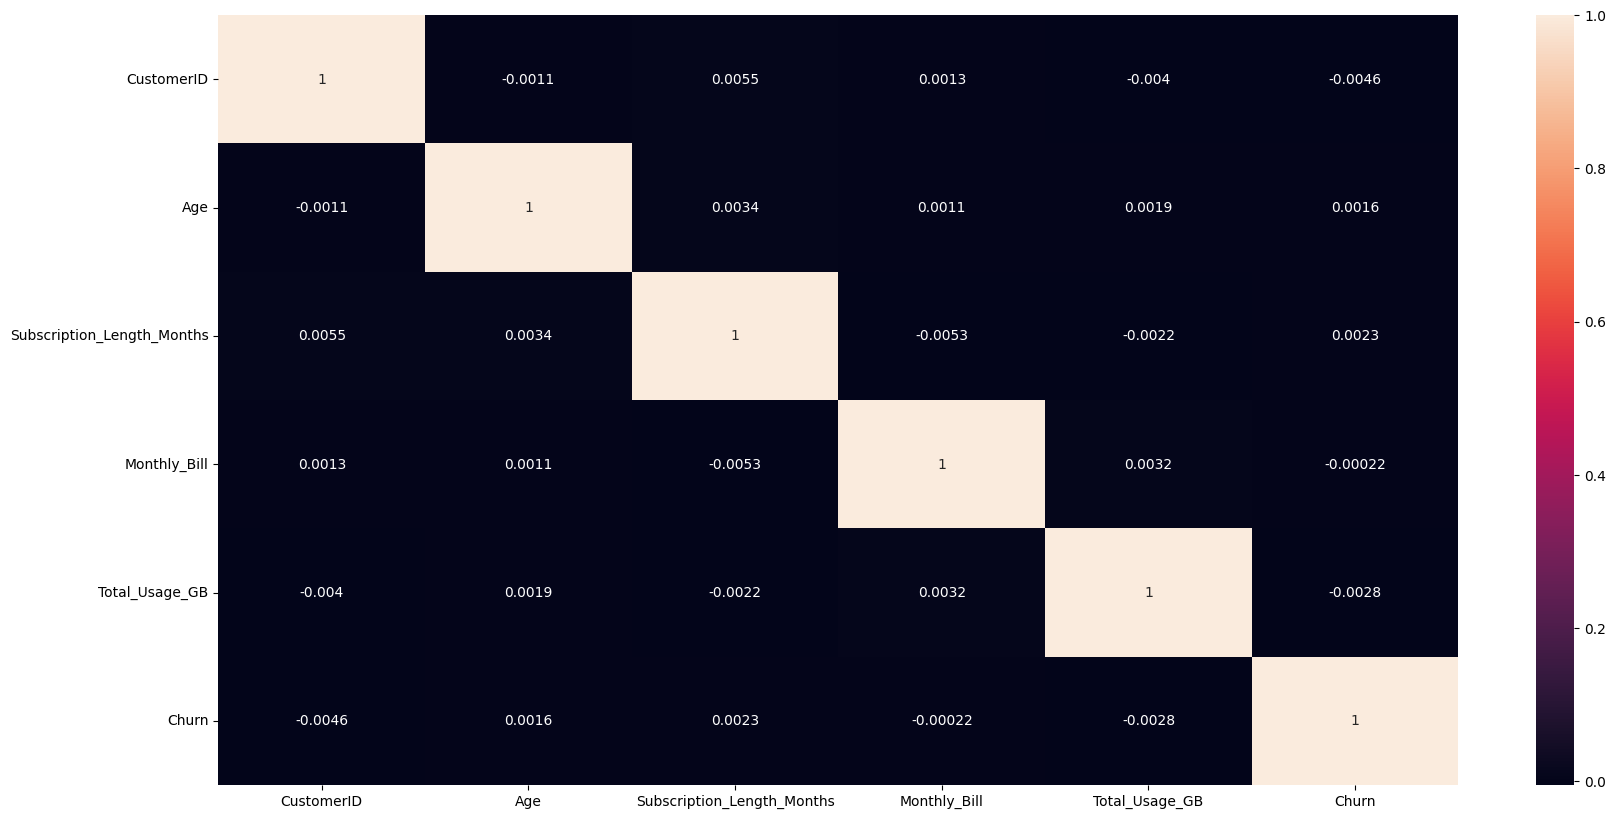

In [28]:
data  = df1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True)

Analyzing Outlier in the dataset with respect to customer status

In [29]:
fig = px.density_heatmap(df1, x='Age', y='Total_Usage_GB')
fig.show()

In [30]:
df1.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# Data Modelling

Replacing the Gender column in the dataset with Label Encoding

0 for Female

1 for Male

In [36]:
df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)

Replacing the columns with 'yes' and 'no' output by Label Encoding

0 for No

1 for Yes

In [37]:
yes_and_no=[  'Paperless Billing', 'Unlimited Data',
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)

Replacing 'Phone Service' with '1'

In [38]:
df1.replace({"Phone Service":{'Yes':1}},inplace=True)

Dropping the Customer_Status

i.e. The column tht we have to predict and set as a dependent variable

# Data Model Building

## Spliiting the data in Training and Test Data

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (assuming 'data' is your DataFrame)
# Perform data preprocessing, encoding, and other necessary steps

# Separate features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [44]:
len(X_train)

4

In [45]:
X_train[:10]

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
Total_Usage_GB,-0.004020,0.001930,-0.002209,0.003192,1.000000
Age,-0.001091,1.000000,0.003389,0.001104,0.001930
CustomerID,1.000000,-0.001091,0.005454,0.001256,-0.004020
Monthly_Bill,0.001256,0.001104,-0.005283,1.000000,0.003192


Importing the required files for the model that is to applied

1. Random Forest Classifier
2. Logistic Regression
3. GaussianNB
4. Decision Tree Classifier
5. XGB Classifier


## Importing Models

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [47]:
model_params = {

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]

        }
    },
}

In [48]:
from sklearn.model_selection import ShuffleSplit

Getting the best_score from the applied models

In [52]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params


It was concluded that XGB_Classifier was giving us the best_score in the dataset

## Selecting the model with best score for the dataset

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)




In [75]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Change to RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/sample_data/customer_churn_large_dataset.csv')
# Split the data into features (X) and target variable (y)
X = data.drop(columns=["CustomerID", "Name", "Churn"])
y = data["Churn"]

# Check for and remove rows with missing target values
missing_target_indices = y.index[y.isna()]
X = X.drop(index=missing_target_indices)
y = y.drop(index=missing_target_indices)

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(exclude=['number']).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy="mean")
X_train[numeric_columns] = numeric_imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = numeric_imputer.transform(X_test[numeric_columns])

# Handle categorical columns (e.g., one-hot encoding)
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.49995
Precision: 0.5035809727418493
Recall: 0.4679181565355582
F1 Score: 0.4850949904752098
Confusion Matrix:
 [[5288 4644]
 [5357 4711]]
